In [1]:
import nltk
import numpy as np
import random
from nltk.corpus import stopwords
import re
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC,LinearSVC,NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
import re
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
file_pos = os.listdir('C://Users//DARSHIT//Desktop//Data Science and AI//NLP//NLTK//Sentiment Analyses//aclImdb//train//pos')
file_pos = [open('C://Users//DARSHIT//Desktop//Data Science and AI//NLP//NLTK//Sentiment Analyses//aclImdb//train//pos//'+i,'r',encoding='utf8').read() for i in file_pos]

In [6]:
file_neg = os.listdir('C://Users//DARSHIT//Desktop//Data Science and AI//NLP//NLTK//Sentiment Analyses//aclImdb//train//neg')
file_neg = [open('C://Users//DARSHIT//Desktop//Data Science and AI//NLP//NLTK//Sentiment Analyses//aclImdb//train//neg//'+i,'r',encoding='utf8').read() for i in file_neg]

In [7]:
file_pos[0]

'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

In [8]:
file_neg[0]

"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."

In [9]:
file_pos = file_pos[:1000]
file_neg = file_neg[:1000]

In [10]:
all_words = []
document = []

stop_words = list(set(stopwords.words('english'))) 

allowed_word_type = ['J'] # j is object, r is adverb, v is verb

for p in file_pos:
    
    document.append((p,'pos'))
    
    clean = re.sub(r'[^(a-zA-Z)\s]','',p)
    
    tokenized = word_tokenize(clean)
    
    stopped = [i for i in tokenized if not tokenized in stop_words]
    
    pos = nltk.pos_tag(stopped)
    #print(pos[1][0])
    for i in pos:
        # print(i[1][0]) # here 1 is second column and 0 meanse first charactor of second column
        if i[1][0] in allowed_word_type:
            all_words.append(i[0].lower())

for p in file_neg:
    
    document.append((p,'neg'))
    
    clean = re.sub(r'[^(a-zA-Z)\s]','',p)
    
    tokenized = word_tokenize(clean)
    
    stopped = [i for i in tokenized if not tokenized in stop_words]
    
    pos = nltk.pos_tag(stopped)
    #print(pos[1][0])
    for i in pos:
        # print(i[1][0]) # here 1 is second column and 0 meanse first charactor of second column
        if i[1][0] in allowed_word_type:
            all_words.append(i[0].lower())

In [12]:
print(len(all_words))
print(all_words[0:5])

38320
['same', 'other', 'such', 'scramble', 'insightful']


In [13]:
document[0]

('Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!',
 'pos')

In [14]:
all_words = nltk.FreqDist(all_words)
all_words

FreqDist({'good': 1198, 'bad': 743, 'other': 664, 'great': 664, 'first': 537, 'more': 515, 'little': 477, 'many': 475, 'much': 425, 'best': 388, ...})

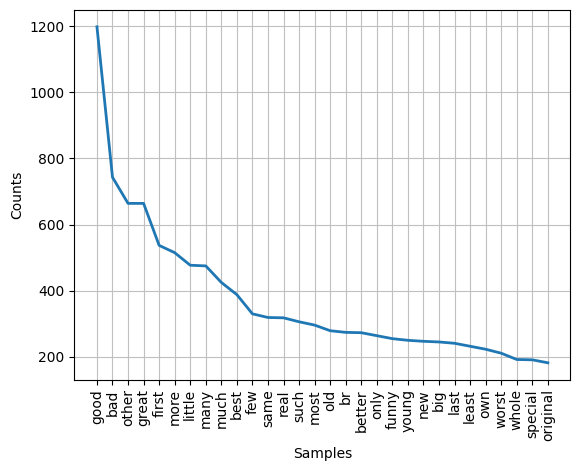

In [15]:
all_words.plot(30,cumulative=False)
plt.show()

In [17]:
word_feature = list(all_words.keys())[:1000]
print(len(word_feature))
print(word_feature[:5])

1000
['same', 'other', 'such', 'scramble', 'insightful']


In [19]:
def find_feature(x):
    words = word_tokenize(x)
    feature = {}
    
    for i in word_feature:
        feature[i] = (i in words)
    return feature  

In [20]:
dataset = [(find_feature(x),category) for (x,category) in document]

In [21]:
dataset[:2]

[({'same': True,
   'other': True,
   'such': True,
   'scramble': True,
   'insightful': True,
   'pathetic': True,
   'whole': True,
   'classic': True,
   'many': True,
   'most': False,
   'theyll': False,
   'next': False,
   'homeless': False,
   'br': False,
   'rich': False,
   'sissy': False,
   'thirty': False,
   'more': False,
   'mutual': False,
   'necessary': False,
   'observant': False,
   'slapstick': False,
   'valuable': False,
   'stupid': False,
   'brilliant': False,
   'dramatic': False,
   'second': False,
   'good': False,
   'funny': False,
   'later': False,
   'fantastic': False,
   'mad': False,
   'malevolent': False,
   'usual': False,
   'hospital': False,
   'alltime': False,
   'legs': False,
   'big': False,
   'better': False,
   'underrated': False,
   'realistic': False,
   'flat': False,
   'lovable': False,
   'reviled': False,
   'impressive': False,
   'much': True,
   'typical': False,
   'less': False,
   'followable': False,
   'overall': F

In [22]:
a = []
for (key,ans) in document:
    a.append(find_feature(key))

In [23]:
len(a)

2000

In [24]:
a[0]

{'same': True,
 'other': True,
 'such': True,
 'scramble': True,
 'insightful': True,
 'pathetic': True,
 'whole': True,
 'classic': True,
 'many': True,
 'most': False,
 'theyll': False,
 'next': False,
 'homeless': False,
 'br': False,
 'rich': False,
 'sissy': False,
 'thirty': False,
 'more': False,
 'mutual': False,
 'necessary': False,
 'observant': False,
 'slapstick': False,
 'valuable': False,
 'stupid': False,
 'brilliant': False,
 'dramatic': False,
 'second': False,
 'good': False,
 'funny': False,
 'later': False,
 'fantastic': False,
 'mad': False,
 'malevolent': False,
 'usual': False,
 'hospital': False,
 'alltime': False,
 'legs': False,
 'big': False,
 'better': False,
 'underrated': False,
 'realistic': False,
 'flat': False,
 'lovable': False,
 'reviled': False,
 'impressive': False,
 'much': True,
 'typical': False,
 'less': False,
 'followable': False,
 'overall': False,
 'characteristic': False,
 'best': False,
 'comedic': False,
 'recent': False,
 'new': False,


In [25]:
random.shuffle(dataset)

train = dataset[:800]
test = dataset[800:]

In [26]:
dataset[1][0]

{'same': False,
 'other': True,
 'such': False,
 'scramble': False,
 'insightful': False,
 'pathetic': False,
 'whole': False,
 'classic': False,
 'many': False,
 'most': False,
 'theyll': False,
 'next': True,
 'homeless': False,
 'br': True,
 'rich': False,
 'sissy': False,
 'thirty': False,
 'more': True,
 'mutual': False,
 'necessary': False,
 'observant': False,
 'slapstick': False,
 'valuable': False,
 'stupid': False,
 'brilliant': False,
 'dramatic': False,
 'second': False,
 'good': True,
 'funny': False,
 'later': False,
 'fantastic': False,
 'mad': False,
 'malevolent': False,
 'usual': False,
 'hospital': False,
 'alltime': False,
 'legs': False,
 'big': False,
 'better': False,
 'underrated': False,
 'realistic': False,
 'flat': False,
 'lovable': False,
 'reviled': False,
 'impressive': False,
 'much': False,
 'typical': False,
 'less': False,
 'followable': False,
 'overall': False,
 'characteristic': False,
 'best': False,
 'comedic': False,
 'recent': False,
 'new': Fa

In [27]:
classifire = nltk.NaiveBayesClassifier.train(train)

In [28]:
print(nltk.classify.accuracy(classifire,test)*100)

75.33333333333333


In [29]:
classifire.show_most_informative_features(15)

Most Informative Features
                   worst = True              neg : pos    =      8.9 : 1.0
                stunning = True              pos : neg    =      8.6 : 1.0
                  superb = True              pos : neg    =      8.6 : 1.0
                   awful = True              neg : pos    =      7.9 : 1.0
                 unusual = True              pos : neg    =      7.2 : 1.0
             pretentious = True              neg : pos    =      6.8 : 1.0
                   worse = True              neg : pos    =      6.8 : 1.0
                  poorly = True              neg : pos    =      6.0 : 1.0
                   cheap = True              neg : pos    =      5.7 : 1.0
           disappointing = True              neg : pos    =      5.5 : 1.0
                   empty = True              neg : pos    =      5.5 : 1.0
                   older = True              neg : pos    =      5.2 : 1.0
                  subtle = True              pos : neg    =      5.2 : 1.0

In [30]:
MNB_clf = SklearnClassifier(MultinomialNB())
MNB_clf = MNB_clf.train(train)

print(nltk.classify.accuracy(MNB_clf,test)*100)

77.16666666666666


In [31]:
B = SklearnClassifier(BernoulliNB())
B = B.train(train)

print(nltk.classify.accuracy(B,test)*100)

74.25


In [32]:
L = SklearnClassifier(LogisticRegression())
L = L.train(train)

print(nltk.classify.accuracy(L,test)*100)

73.75


In [33]:
S = SklearnClassifier(SGDClassifier())
S = S.train(train)

print(nltk.classify.accuracy(S,test)*100)

72.25


In [34]:
S = SklearnClassifier(SVC())
S = S.train(train)

print(nltk.classify.accuracy(S,test)*100)

74.0
